In [ ]:
##2010 Traffic Collisions

In [35]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import plotly.express as px
from sodapy import Socrata
import requests

In [50]:
gdf = gpd.read_file('2010_.csv')

In [63]:
gdf2 = gpd.read_file('night.csv')

In [51]:
gdf['lat']=gdf['Location'].str.extract(r'\((.*),.*\)')
gdf['long']=gdf['Location'].str.extract(r'\(.*,(.*)\)')
gdf.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Location,Zip Codes,Census Tracts,Precinct Boundaries,LA Specific Plans,Council Districts,Neighborhood Councils (Certified),geometry,lat,long
0,100104094,01/03/2010,01/02/2010,1945,01,Central,0159,997,TRAFFIC COLLISION,,...,"(34.0404, -118.233)",23082,533,1287,,9,28,None,34.0404,-118.233
1,100104092,01/02/2010,01/02/2010,1833,01,Central,0161,997,TRAFFIC COLLISION,0605,...,"(34.0487, -118.2627)",23078,546,1050,,9,76,None,34.0487,-118.2627
2,100204062,01/02/2010,01/02/2010,1345,02,Rampart,0295,997,TRAFFIC COLLISION,,...,"(34.0404, -118.2822)",22723,697,1521,,11,8,None,34.0404,-118.2822
3,100204052,01/02/2010,01/02/2010,0715,02,Rampart,0248,997,TRAFFIC COLLISION,,...,"(34.0594, -118.2644)",23078,566,1047,,11,67,None,34.0594,-118.2644
4,100304112,01/02/2010,01/02/2010,1550,03,Southwest,0397,997,TRAFFIC COLLISION,,...,"(34.0037, -118.3002)",24027,733,1048,7,14,35,None,34.0037,-118.3002


In [52]:
gdf = gpd.GeoDataFrame(gdf, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(gdf.long, gdf.lat))

In [53]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

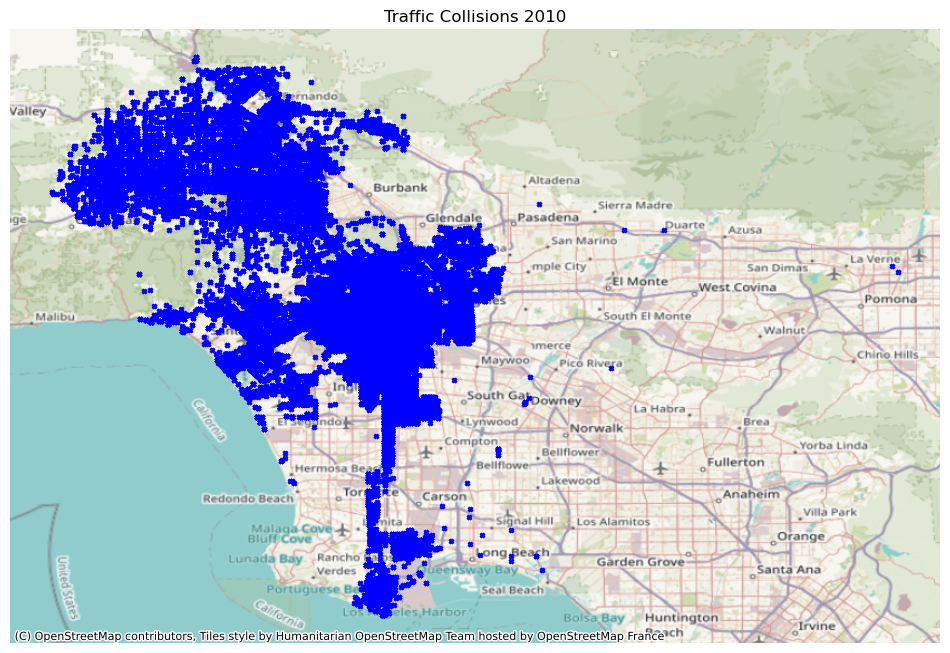

In [54]:
fig, ax = plt.subplots(figsize=(12,12))

ax = gdf.clip([-189,18,-66,71]).plot(ax=ax, 
        marker='X',
        markersize=10,
        color='blue')

ax.axis('off')

ax.set_title('Traffic Collisions 2010')

ctx.add_basemap(ax, crs=4326)

In [55]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 44976 entries, 0 to 44975
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   DR Number                          44976 non-null  object  
 1   Date Reported                      44976 non-null  object  
 2   Date Occurred                      44976 non-null  object  
 3   Time Occurred                      44976 non-null  object  
 4   Area ID                            44976 non-null  object  
 5   Area Name                          44976 non-null  object  
 6   Reporting District                 44976 non-null  object  
 7   Crime Code                         44976 non-null  object  
 8   Crime Code Description             44976 non-null  object  
 9   MO Codes                           44976 non-null  object  
 10  Victim Age                         44976 non-null  object  
 11  Victim Sex                       

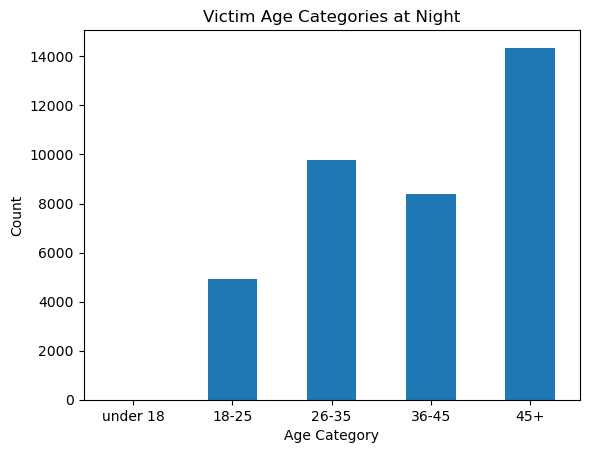

In [56]:
import pandas as pd


gdf2['Victim Age'] = pd.to_numeric(gd2f['Victim Age'], errors='coerce')


gdf2 = gdf.dropna(subset=['Victim Age'])




gdf2['age_by_cat'] = pd.cut(gdf2['Victim Age'], bins=[0, 18, 25, 35, 45, float('inf')], labels=['under 18', '18-25', '26-35', '36-45', '45+'], right=False, include_lowest=True)

gdf2['age_by_cat'].value_counts().sort_index().plot(kind='bar', rot=0)
plt.title('Victim Age Categories at Night')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.show()


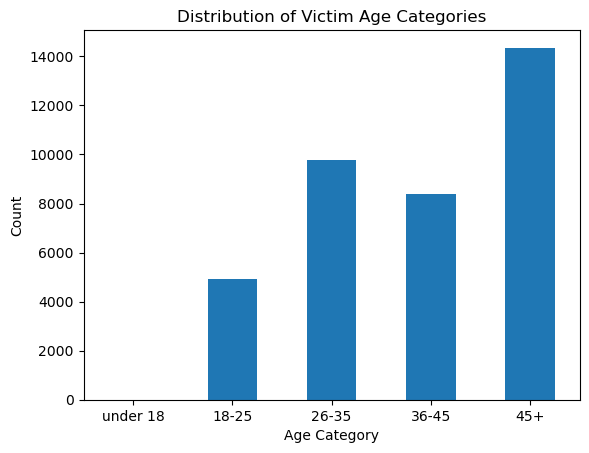

In [57]:

gdf['Time Occurred'] = pd.to_numeric(gdf['Victim Age'], errors='coerce')


gdf = gdf.dropna(subset=['Victim Age'])



gdf['age_by_cat'] = pd.cut(gdf['Victim Age'], bins=[0, 18, 25, 35, 45, float('inf')], labels=['under 18', '18-25', '26-35', '36-45', '45+'], right=False, include_lowest=True)

gdf['age_by_cat'].value_counts().sort_index().plot(kind='bar', rot=0)
plt.title('Distribution of Victim Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.show()

In [58]:
gdf.age_by_cat.count()

37478

In [59]:
Area = ["West LA","Hollywood","Central", "Van Nuys","Harbor" ]

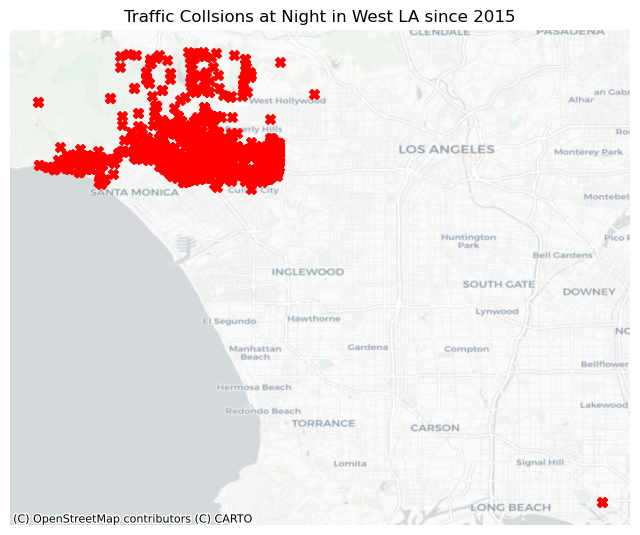

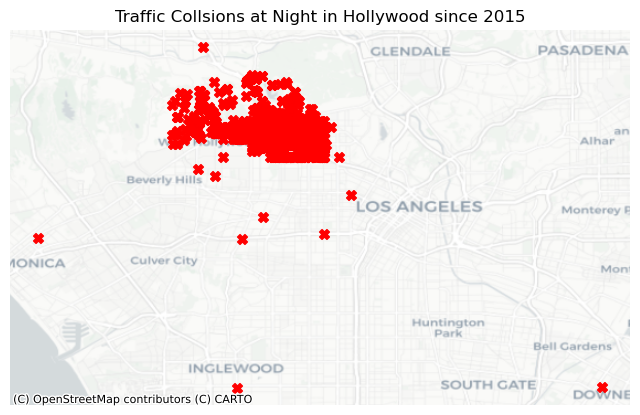

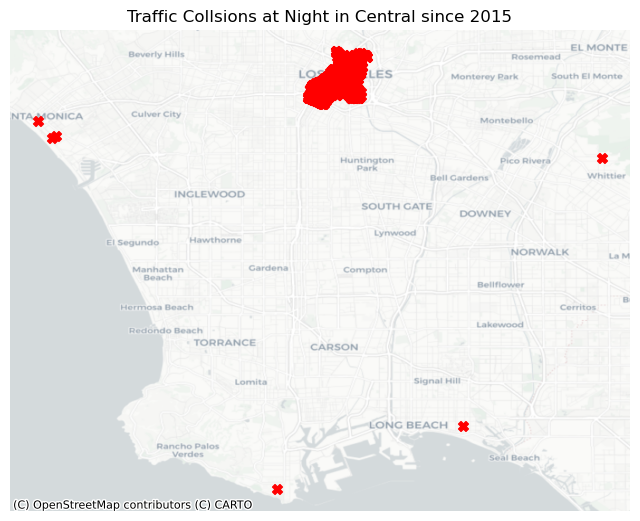

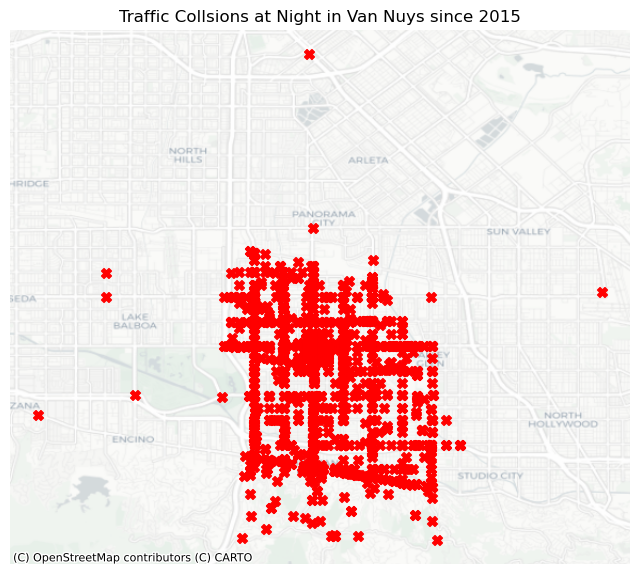

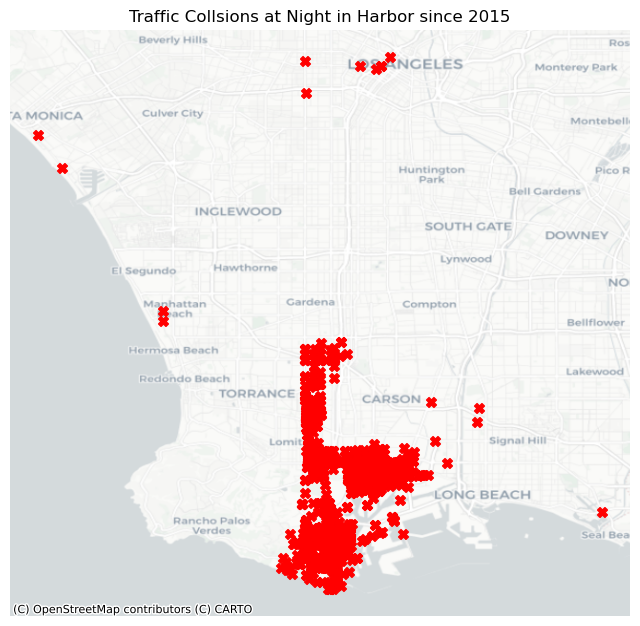

In [60]:

for city in Area:

  
    fig, ax = plt.subplots(figsize=(8,8))

    gdf[gdf['Area Name'] == city].plot(ax=ax, 
                          marker='X',
                          markersize=50,
                          color='red')

    ax.axis('off')
  
    ax.set_title('Traffic Collsions at Night in '+str(city) + ' since 2015')

    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=4326)

Unique values in 'month_by_cat': ['Jan-Apr', 'May-Aug', 'Sep-Dec', NaN]
Categories (3, object): ['Jan-Apr' < 'May-Aug' < 'Sep-Dec']
Counts of each category: month_by_cat
Jan-Apr     9146
May-Aug    12363
Sep-Dec    12517
Name: count, dtype: int64


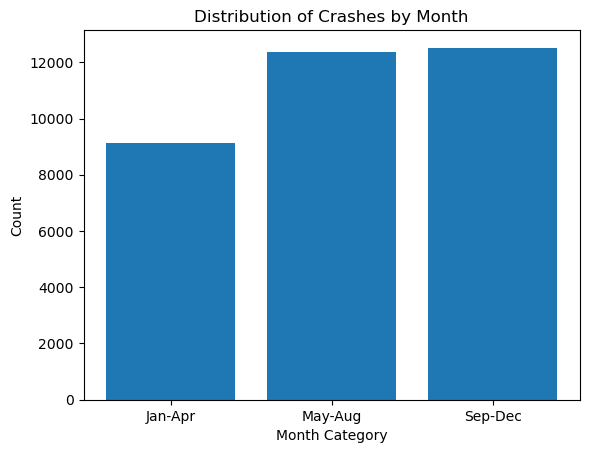

In [61]:
import pandas as pd
import matplotlib.pyplot as plt


gdf['Date Occurred'] = pd.to_datetime(gdf['Date Occurred'], format='%m/%d/%Y', errors='coerce')

gdf = gdf.dropna(subset=['Date Occurred'])

gdf['month_by_cat'] = pd.cut(
    gdf['Date Occurred'].dt.month,
    bins=[0, 4, 8, 12],  
    labels=['Jan-Apr', 'May-Aug', 'Sep-Dec'],
    right=False,
    include_lowest=True
)


print("Unique values in 'month_by_cat':", gdf['month_by_cat'].unique())
print("Counts of each category:", gdf['month_by_cat'].value_counts().sort_index())

plt.bar(gdf['month_by_cat'].value_counts().sort_index().index, gdf['month_by_cat'].value_counts().sort_index())
plt.title('Distribution of Crashes by Month')
plt.xlabel('Month Category')
plt.ylabel('Count')
plt.show()


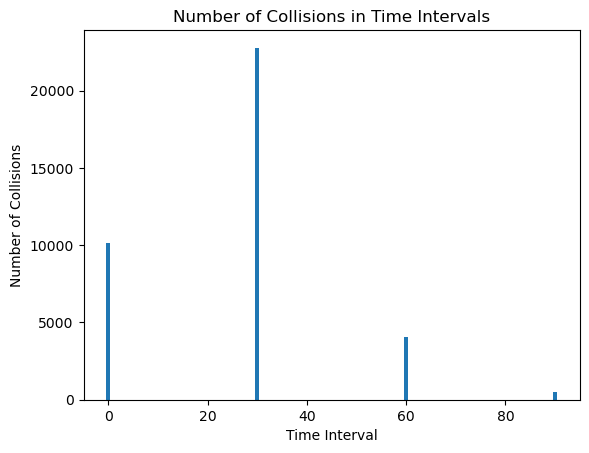

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

gdf['Time Occurred'] = pd.to_numeric(gdf['Time Occurred'], errors='coerce')

gdf = gdf.dropna(subset=['Time Occurred'])

interval_size = 30
gdf['Time Interval'] = (gdf['Time Occurred'] // interval_size) * interval_size

plt.bar(gdf['Time Interval'].value_counts().sort_index().index, gdf['Time Interval'].value_counts().sort_index())
plt.title('Number of Collisions in Time Intervals')
plt.xlabel('Time Interval')
plt.ylabel('Number of Collisions')
plt.show()
